<a href="https://colab.research.google.com/github/chjohnso-um/chjohnso-um-CSC-587/blob/main/Copy_of_tf_idf_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


TF-IDF Matrix:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.31527493 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.31527493 0.         0.
  0.         0.         0.         0.         0.         0.38447491
  0.38447491 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.50277307 0.         0.50277307]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.43981827 0.         0.         0.         0.         0.
  0.         0.43981827 0.         0.         0.         0.
  0.         0.         0.         0.43981827 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.    

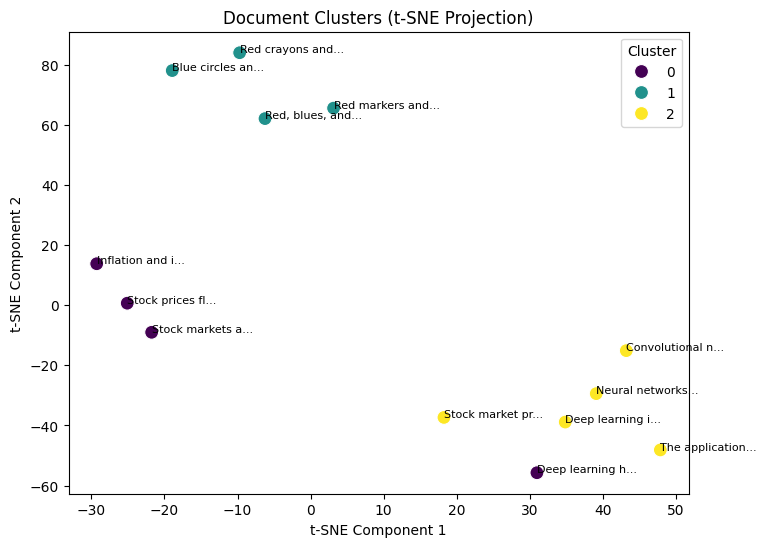

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# my corpus
documents = [
    "Neural networks are widely used in deep learning.",
    "Convolutional neural networks are effective for image recognition.",
    "Stock markets are influenced by economic policies.",
    "Inflation and interest rates impact the global economy.",
    "Deep learning has applications in natural language processing.",
    "Stock prices fluctuate based on global economic conditions.",
    "Red crayons and blue crayons for coloring my drawings.",
    "Red markers and green markers for marking exam answers.",
    "Blue circles and green circles for identifying clusters.",
    "Red, blues, and green squares for color coding project labels.",
    "Deep learning is a subset of machine learning that focuses on neural networks.",
    "The application of deep learning in financial economics.",
    "Stock market prediction using deep learning models."

]

# You don't have to do calculations by hand. ALready available library for TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

print("TF-IDF Matrix:")
print(X.toarray())


# Applying K-Means clustering.Please just use it now
num_clusters = 3  # You can change this
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# We reduce dimensions using t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

# Now we plot the transformed data as we did in PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=clusters, palette="viridis", s=100)
for i, txt in enumerate(documents):
    plt.annotate(txt[:15] + "...", (X_embedded[i, 0], X_embedded[i, 1]), fontsize=8)

plt.title("Document Clusters (t-SNE Projection)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()



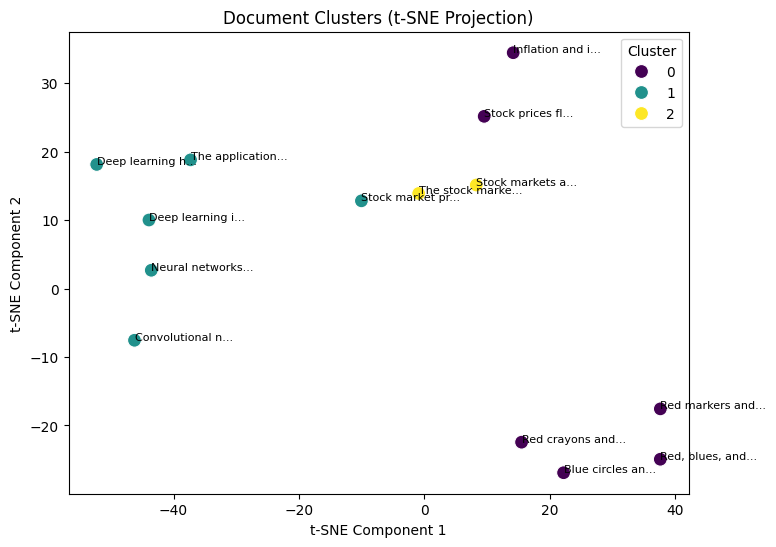

In [3]:
# Plotting the sentences again, but with one additional sentence that alters the clusters

# my corpus
documents = [
    "Neural networks are widely used in deep learning.",
    "Convolutional neural networks are effective for image recognition.",
    "Stock markets are influenced by economic policies.",
    "Inflation and interest rates impact the global economy.",
    "Deep learning has applications in natural language processing.",
    "Stock prices fluctuate based on global economic conditions.",
    "Red crayons and blue crayons for coloring my drawings.",
    "Red markers and green markers for marking exam answers.",
    "Blue circles and green circles for identifying clusters.",
    "Red, blues, and green squares for color coding project labels.",
    "Deep learning is a subset of machine learning that focuses on neural networks.",
    "The application of deep learning in financial economics.",
    "Stock market prediction using deep learning models.",
    "The stock market is in the red today due to economic downturns."

] # Adding the last sentence which includes "red", "stock market" and "economic" radically changes the clusters.

# You don't have to do calculations by hand. ALready available library for TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# print("TF-IDF Matrix:")
# print(X.toarray())


# Applying K-Means clustering.Please just use it now
num_clusters = 3  # You can change this
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# We reduce dimensions using t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

# Now we plot the transformed data as we did in PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=clusters, palette="viridis", s=100)
for i, txt in enumerate(documents):
    plt.annotate(txt[:15] + "...", (X_embedded[i, 0], X_embedded[i, 1]), fontsize=8)

plt.title("Document Clusters (t-SNE Projection)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()
